# Experiments on Synthetic hypergraph

In this notebook, we reproduce the results reported in our paper "From unbiased to maximal entropy random walks on hypergraphs" in subsection IV.A.2 *Hypergraph model*. Specifically, Fig 5,6,7,and 8. 
This notebook assumes that one ran the python scripts in the `python` folder and saved them in the respective folder. In particular, we generate:
* **Homogeneous hypergraph with Poisson degree distribution**: the generated files are assumed to be in the folder `data/poisson_cardinalities`. The plot corresponds to Figure 5.
* **Homogeneous hypergraph with Power-Law degree distribution**: the generated files are assumed to be in the folder `data/pl_cardinalities`. The plot corresponds to Figure 6.
* **Uniform and homogeneous hypergraph**: the generate files are assumed to be in the folder `data/uniform`. The plot corresponds to Figure 7.
* **Uniform and heterogeneouss hypergraph**: the generate files are assumed to be in the folder `data/pl_uniform`. The plot corresponds to Figure 8.

In [1]:
import os
os.chdir('../')

from utils import HypergraphModels as HM
from utils import HypergraphStructure as HS
from utils import HypergraphRW as HRW

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

### Figure 5
Mean hitting time on random hypergraphs following a **Poisson** distribution of cardinalities, $P(|e_j|) \sim \text{Poisson}(\beta)$, $N = 10^3$ and $M = 10^3$. For each parameter, we have $10^3$ independently generated hypergraphs, each one being a point in each panel. The median is represented by a black continuous line and the first and third quartiles are the dashed lines.

In [3]:
directory = 'data/poisson_cardinalities/'
betas = np.arange(5,26)
Nexp = 100
rws = ['urw_ho','merw_ho','urw_p','merw_p'] # types of RWs to plot
T = [np.zeros((len(betas),Nexp)) for i in range(len(rws))]
for i,b in enumerate(betas):
    for j,rw in enumerate(rws):
        name = f'{directory}exp_{rw}_beta_{b:.2f}.txt'
        T[j][i,:] = np.loadtxt(name)

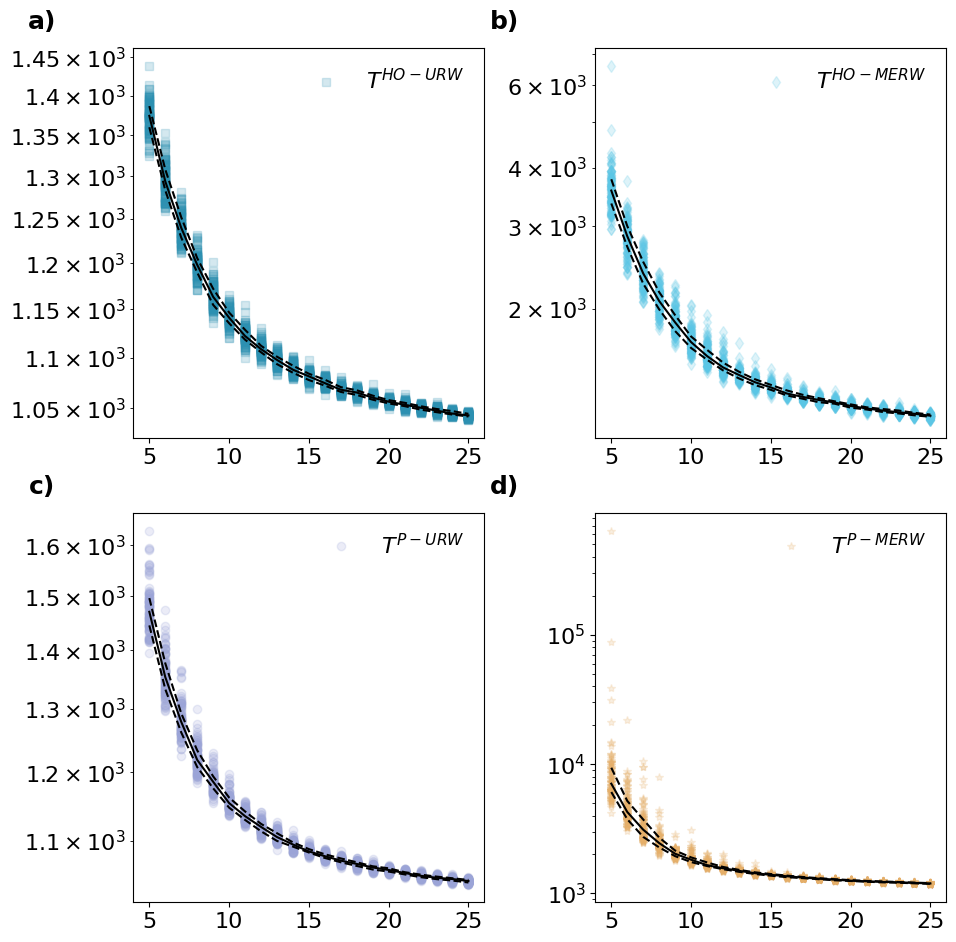

In [4]:
### plots
plt.rcParams.update({'font.size': 16})
# plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['svg.fonttype'] = 'none'

fig,axs = plt.subplots(2,2,figsize = (10,10))

colors = [(44/255,144/255,177/255),(91/255,198/255,229/255),(155/255,164/255,215/255),(229/255,175/255,105/255)]
styles = ['s','d','o','*']
labels = [r'$T^{HO-URW}$',r'$T^{HO-MERW}$',r'$T^{P-URW}$',r'$T^{P-MERW}$']

xs = np.array([[b]*Nexp for b in betas])
for i in range(4):
    axs[i//2,i%2].semilogy(np.concatenate(xs),np.concatenate(T[i]),styles[i],color=colors[i],alpha = 0.2, label = labels[i])
    axs[i//2,i%2].plot(betas,np.median(T[i],axis=1), color = 'black') # median
    axs[i//2,i%2].plot(betas,np.quantile(T[i],q = 0.25,axis=1), color = 'black', ls = '--') #first quartile
    axs[i//2,i%2].plot(betas,np.quantile(T[i],q = 0.75,axis=1), color = 'black', ls = '--') #third quartile
    axs[i//2,i%2].legend(loc=1, fancybox=False, edgecolor='k', framealpha=0)
    axs[i//2,i%2].set_xticks(np.arange(5, 26, step=5))

fig.subplots_adjust(
top=0.954,
bottom=0.1,
left=0.18,
right=0.993,
hspace=0.193,
wspace=0.316
)

axs[0,0].text(-0.26, 1.05, "a)", ha="center", transform=axs[0,0].transAxes, weight="semibold", fontsize=18)
axs[0,1].text(-0.26, 1.05, "b)", ha="center", transform=axs[0,1].transAxes, weight="semibold", fontsize=18)
axs[1,0].text(-0.26, 1.05, "c)", ha="center", transform=axs[1,0].transAxes, weight="semibold", fontsize=18)
axs[1,1].text(-0.26, 1.05, "d)", ha="center", transform=axs[1,1].transAxes, weight="semibold", fontsize=18)

#plt.savefig('plots/Poisson_Cardinalities.pdf')
plt.show()

### Figure 6
Mean hitting time on random hypergraphs following a **power-law** distribution of cardinalities, $P(|e_j|) \sim |e_j|^{-\gamma}$, $N = 10^3$ and $M = 10^3$. For each parameter, we have $10^3$ independently generated hypergraphs, each one being a point in each panel. The median is represented by a black continuous line and the first and third quartiles are the dashed lines.

In [5]:
directory = 'data/pl_cardinalities/'
gammas = np.linspace(2.05, 3.5, 30)
Nexp = 100
rws = ['urw_ho','merw_ho','urw_p','merw_p'] # types of RWs to plot
T = [np.zeros((len(gammas),Nexp)) for i in range(len(rws))]
for i,b in enumerate(gammas):
    for j,rw in enumerate(rws):
        name = f'{directory}exp_{rw}_gamma_{b:.2f}.txt'
        T[j][i,:] = np.loadtxt(name)

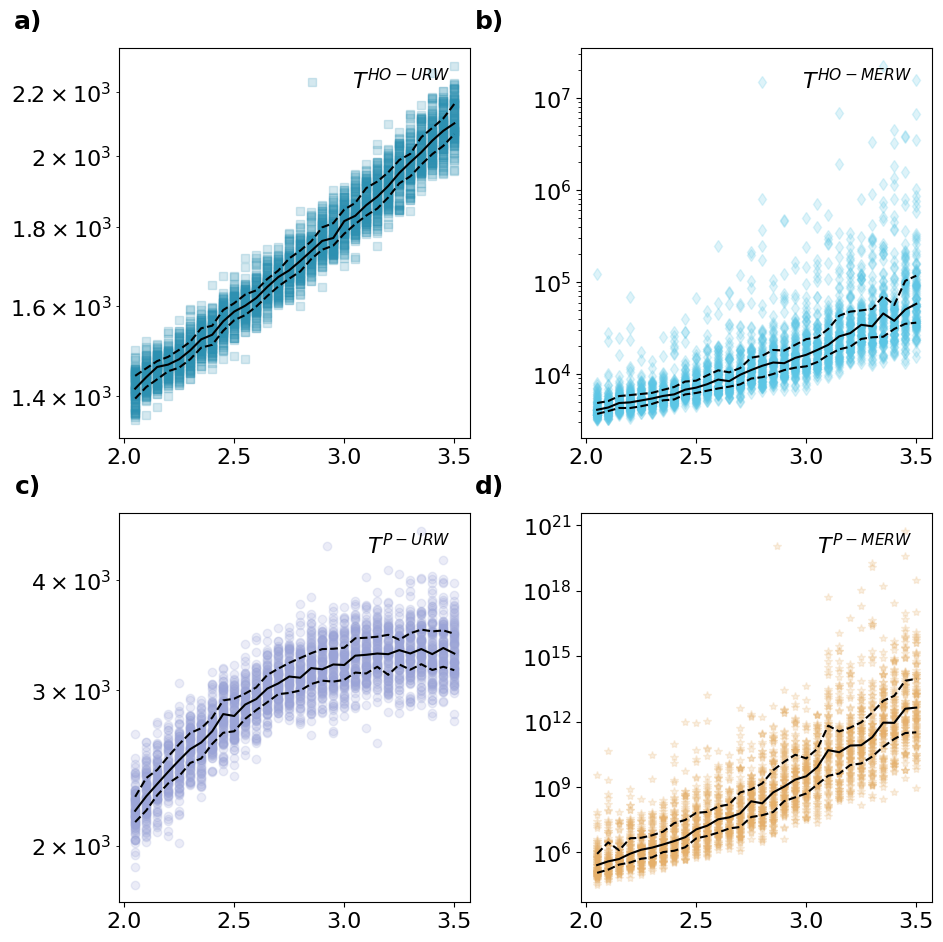

In [6]:
### plots
plt.rcParams.update({'font.size': 16})
# plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['svg.fonttype'] = 'none'

fig,axs = plt.subplots(2,2,figsize = (10,10))

colors = [(44/255,144/255,177/255),(91/255,198/255,229/255),(155/255,164/255,215/255),(229/255,175/255,105/255)]
styles = ['s','d','o','*']
labels = [r'$T^{HO-URW}$',r'$T^{HO-MERW}$',r'$T^{P-URW}$',r'$T^{P-MERW}$']

xs = np.array([[b]*Nexp for b in gammas])
for i in range(4):
    axs[i//2,i%2].semilogy(np.concatenate(xs),np.concatenate(T[i]),styles[i],color=colors[i],alpha = 0.2, label = labels[i])
    axs[i//2,i%2].plot(gammas,np.median(T[i],axis=1), color = 'black') # median
    axs[i//2,i%2].plot(gammas,np.quantile(T[i],q = 0.25,axis=1), color = 'black', ls = '--') #first quartile
    axs[i//2,i%2].plot(gammas,np.quantile(T[i],q = 0.75,axis=1), color = 'black', ls = '--') #third quartile
    axs[i//2,i%2].legend(loc=1, fancybox=False, edgecolor='k', framealpha=0)
    axs[i//2,i%2].set_xticks([2.0, 2.5, 3.0, 3.5])

fig.subplots_adjust(
top=0.954,
bottom=0.1,
left=0.18,
right=0.993,
hspace=0.193,
wspace=0.316
)

axs[0,0].text(-0.26, 1.05, "a)", ha="center", transform=axs[0,0].transAxes, weight="semibold", fontsize=18)
axs[0,1].text(-0.26, 1.05, "b)", ha="center", transform=axs[0,1].transAxes, weight="semibold", fontsize=18)
axs[1,0].text(-0.26, 1.05, "c)", ha="center", transform=axs[1,0].transAxes, weight="semibold", fontsize=18)
axs[1,1].text(-0.26, 1.05, "d)", ha="center", transform=axs[1,1].transAxes, weight="semibold", fontsize=18)

#plt.savefig('plots/Poisson_Cardinalities.pdf')
plt.show()

### Figure 7
Mean hitting time on **uniform homogeneous** random hypergraphs, $N = 10^3$ and $M = 10^3$. For each parameter, we have $10^3$ independently generated hypergraphs, each one being a point in each panel. The median is represented by a black continuous line and the first and third quartiles are the dashed lines.

In [7]:
directory = 'data/uniform/'
cardinalities = np.arange(5,26)
Nexp = 100
rws = ['urw_ho','merw_ho','urw_p','merw_p'] # types of RWs to plot
T = [np.zeros((len(cardinalities),Nexp)) for i in range(len(rws))]
for i,b in enumerate(cardinalities):
    for j,rw in enumerate(rws):
        name = f'{directory}exp_{rw}_cardinality_{b:.2f}.txt'
        T[j][i,:] = np.loadtxt(name)

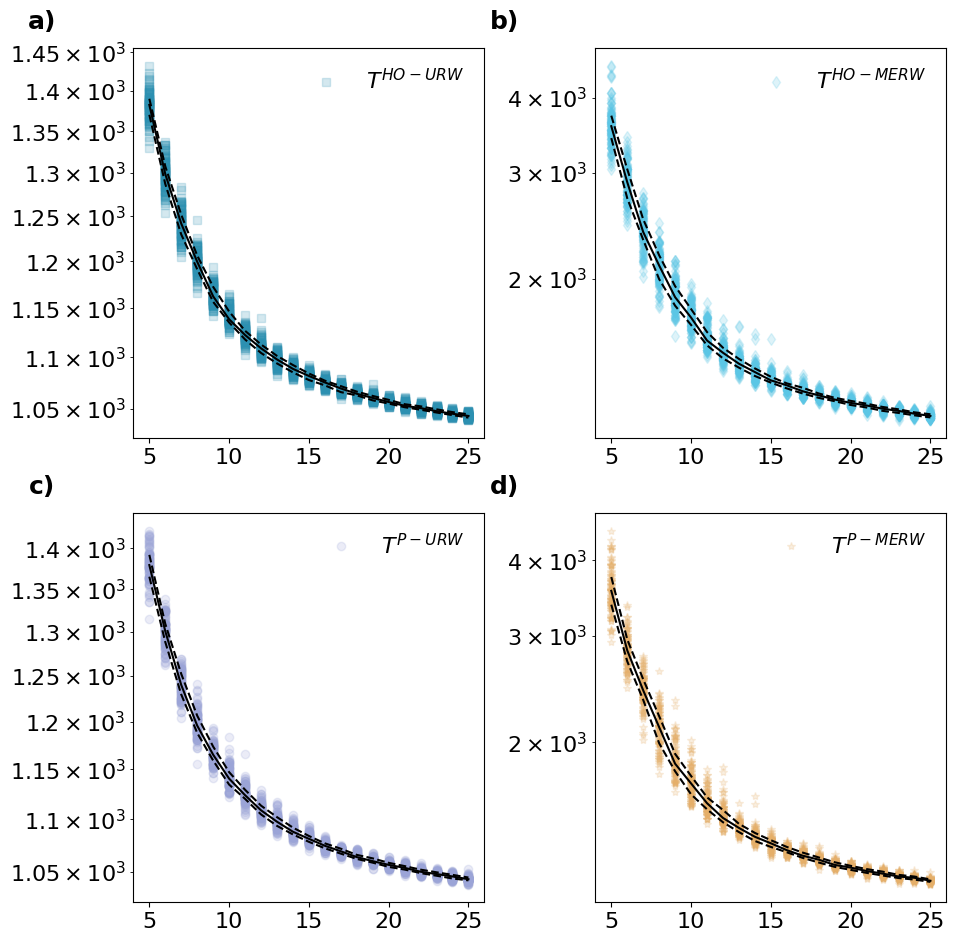

In [8]:
### plots
plt.rcParams.update({'font.size': 16})
# plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['svg.fonttype'] = 'none'

fig,axs = plt.subplots(2,2,figsize = (10,10))

colors = [(44/255,144/255,177/255),(91/255,198/255,229/255),(155/255,164/255,215/255),(229/255,175/255,105/255)]
styles = ['s','d','o','*']
labels = [r'$T^{HO-URW}$',r'$T^{HO-MERW}$',r'$T^{P-URW}$',r'$T^{P-MERW}$']

xs = np.array([[b]*Nexp for b in cardinalities])
for i in range(4):
    axs[i//2,i%2].semilogy(np.concatenate(xs),np.concatenate(T[i]),styles[i],color=colors[i],alpha = 0.2, label = labels[i])
    axs[i//2,i%2].plot(cardinalities,np.median(T[i],axis=1), color = 'black') # median
    axs[i//2,i%2].plot(cardinalities,np.quantile(T[i],q = 0.25,axis=1), color = 'black', ls = '--') #first quartile
    axs[i//2,i%2].plot(cardinalities,np.quantile(T[i],q = 0.75,axis=1), color = 'black', ls = '--') #third quartile
    axs[i//2,i%2].legend(loc=1, fancybox=False, edgecolor='k', framealpha=0)
    axs[i//2,i%2].set_xticks(np.arange(5, 26, step=5))

fig.subplots_adjust(
top=0.954,
bottom=0.1,
left=0.18,
right=0.993,
hspace=0.193,
wspace=0.316
)

axs[0,0].text(-0.26, 1.05, "a)", ha="center", transform=axs[0,0].transAxes, weight="semibold", fontsize=18)
axs[0,1].text(-0.26, 1.05, "b)", ha="center", transform=axs[0,1].transAxes, weight="semibold", fontsize=18)
axs[1,0].text(-0.26, 1.05, "c)", ha="center", transform=axs[1,0].transAxes, weight="semibold", fontsize=18)
axs[1,1].text(-0.26, 1.05, "d)", ha="center", transform=axs[1,1].transAxes, weight="semibold", fontsize=18)

#plt.savefig('plots/Poisson_Cardinalities.pdf')
plt.show()

### Figure 8
Mean hitting time on uniform random hypergraphs following a **power-law degree distribution**, $P(k)  \sim k^{-\gamma}$, $N = 10^3$, $|e_j| = 20$ and $M = 10^3$. The average degree is $20$. For each parameter, we have $10^3$ independently generated hypergraphs, each one being a point in each panel. The median is represented by a black continuous line and the first and third quartiles are the dashed lines.

In [9]:
directory = 'data/pl_uniform/'
gammas = np.linspace(2.1, 3.5, 29)
Nexp = 100
rws = ['urw_ho','merw_ho','urw_p','merw_p'] # types of RWs to plot
T = [np.zeros((len(gammas),Nexp)) for i in range(len(rws))]
for i,b in enumerate(gammas):
    for j,rw in enumerate(rws):
        name = f'{directory}exp_{rw}_gamma_{b:.2f}.txt'
        T[j][i,:] = np.loadtxt(name)

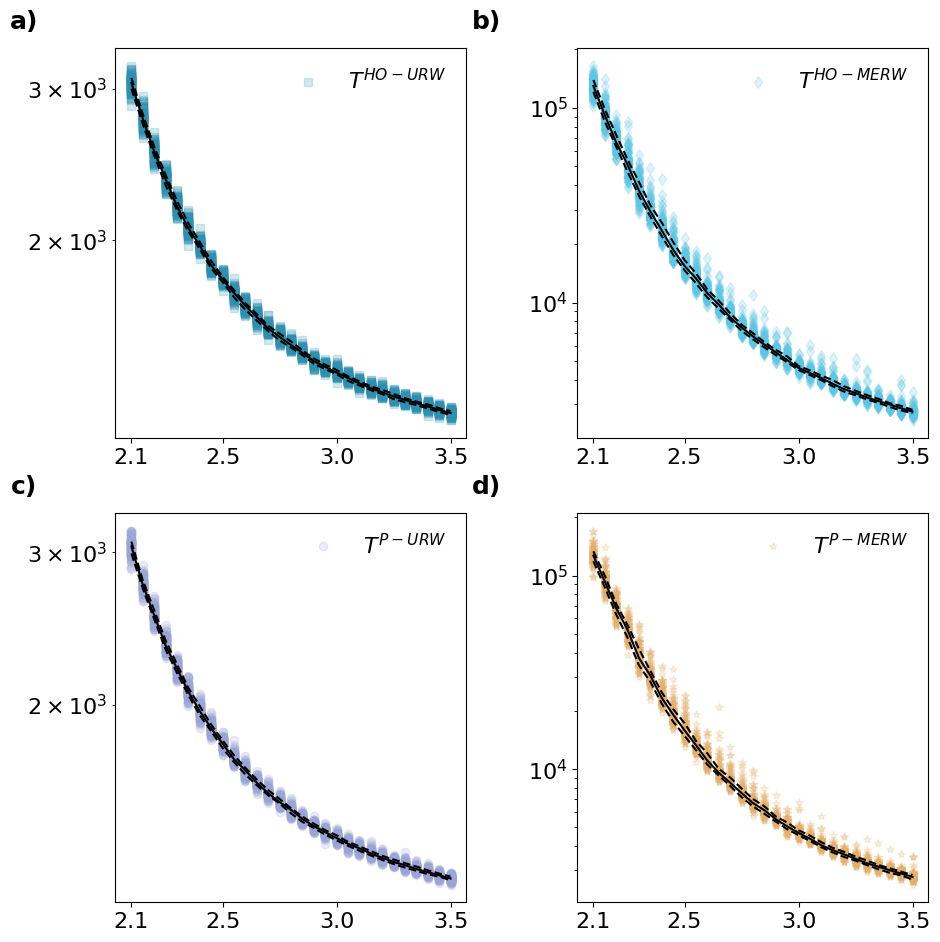

In [10]:
### plots
plt.rcParams.update({'font.size': 16})
# plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['svg.fonttype'] = 'none'

fig,axs = plt.subplots(2,2,figsize = (10,10))

colors = [(44/255,144/255,177/255),(91/255,198/255,229/255),(155/255,164/255,215/255),(229/255,175/255,105/255)]
styles = ['s','d','o','*']
labels = [r'$T^{HO-URW}$',r'$T^{HO-MERW}$',r'$T^{P-URW}$',r'$T^{P-MERW}$']

xs = np.array([[b]*Nexp for b in gammas])
for i in range(4):
    axs[i//2,i%2].semilogy(np.concatenate(xs),np.concatenate(T[i]),styles[i],color=colors[i],alpha = 0.2, label = labels[i])
    axs[i//2,i%2].plot(gammas,np.median(T[i],axis=1), color = 'black') # median
    axs[i//2,i%2].plot(gammas,np.quantile(T[i],q = 0.25,axis=1), color = 'black', ls = '--') #first quartile
    axs[i//2,i%2].plot(gammas,np.quantile(T[i],q = 0.75,axis=1), color = 'black', ls = '--') #third quartile
    axs[i//2,i%2].legend(loc=1, fancybox=False, edgecolor='k', framealpha=0)
    axs[i//2,i%2].set_xticks([2.1, 2.5, 3.0, 3.5])

fig.subplots_adjust(
top=0.954,
bottom=0.1,
left=0.18,
right=0.993,
hspace=0.193,
wspace=0.316
)

axs[0,0].text(-0.26, 1.05, "a)", ha="center", transform=axs[0,0].transAxes, weight="semibold", fontsize=18)
axs[0,1].text(-0.26, 1.05, "b)", ha="center", transform=axs[0,1].transAxes, weight="semibold", fontsize=18)
axs[1,0].text(-0.26, 1.05, "c)", ha="center", transform=axs[1,0].transAxes, weight="semibold", fontsize=18)
axs[1,1].text(-0.26, 1.05, "d)", ha="center", transform=axs[1,1].transAxes, weight="semibold", fontsize=18)

#plt.savefig('plots/Poisson_Cardinalities.pdf')
plt.show()